In [8]:
import os
from PIL import Image

# Specify the directory containing .ppm files
input_dir = r'Z:\code\python-facog\sample_train_data'
output_dir = r'Z:\code\python-facog\converted_images'  # Directory to save converted images

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to convert .ppm files to .png or .jpg
def convert_ppm_to_png_jpg(input_dir, output_format='png'):
    # Walk through all directories and subdirectories
    for root, dirs, files in os.walk(input_dir):
        for img_file in files:
            if img_file.lower().endswith('.ppm'):
                img_path = os.path.join(root, img_file)
                try:
                    with Image.open(img_path) as img:
                        # Set the output filename
                        output_filename = os.path.splitext(img_file)[0] + f'.{output_format}'
                        
                        # Determine the output class folder structure
                        relative_path = os.path.relpath(root, input_dir)
                        output_class_folder = os.path.join(output_dir, relative_path)
                        
                        # Create the class folder in the output directory if it doesn't exist
                        os.makedirs(output_class_folder, exist_ok=True)
                        
                        # Save the converted image
                        output_path = os.path.join(output_class_folder, output_filename)
                        img.save(output_path, format='JPEG' if output_format.lower() == 'jpg' else output_format.upper())
                        print(f'Converted {img_path} to {output_path}')
                except (IOError, SyntaxError, OSError) as e:
                    print(f'Error converting image: {img_path} - {e}')

# Call the conversion function
convert_ppm_to_png_jpg(input_dir, output_format='jpg')  # Change to 'png' if you want PNG format


Converted Z:\code\python-facog\sample_train_data\S045\aug_0_S045-01-t10_02.ppm to Z:\code\python-facog\converted_images\S045\aug_0_S045-01-t10_02.jpg
Converted Z:\code\python-facog\sample_train_data\S045\aug_5_S045-01-t10_02.ppm to Z:\code\python-facog\converted_images\S045\aug_5_S045-01-t10_02.jpg
Converted Z:\code\python-facog\sample_train_data\S045\aug_6_S045-01-t10_02.ppm to Z:\code\python-facog\converted_images\S045\aug_6_S045-01-t10_02.jpg
Converted Z:\code\python-facog\sample_train_data\S058\aug_5_S058-03-t10_01.ppm to Z:\code\python-facog\converted_images\S058\aug_5_S058-03-t10_01.jpg
Converted Z:\code\python-facog\sample_train_data\S058\aug_9_S058-01-t10_01.ppm to Z:\code\python-facog\converted_images\S058\aug_9_S058-01-t10_01.jpg
Converted Z:\code\python-facog\sample_train_data\S093\aug_5_S093-01-t10_01.ppm to Z:\code\python-facog\converted_images\S093\aug_5_S093-01-t10_01.jpg
Converted Z:\code\python-facog\sample_train_data\S124\aug_7_S124-02-t10_01.ppm to Z:\code\python-fac

In [10]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Directory containing your dataset
data_dir = r'Z:\code\python-facog\sample_train_data'

# Function to check and remove corrupted .ppm images
def remove_corrupted_ppm_images(data_dir):
    for class_folder in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_folder)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                if img_file.lower().endswith('.ppm'):
                    img_path = os.path.join(class_path, img_file)
                    try:
                        with Image.open(img_path) as img:
                            img.verify()  # Verify if the image is valid
                    except (IOError, SyntaxError, OSError) as e:
                        print(f'Removing corrupted image: {img_path} - {e}')
                        os.remove(img_path)  # Remove the corrupted image

# Remove corrupted images
remove_corrupted_ppm_images(data_dir)

# Data generator setup
def create_data_generator(data_dir):
    data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    
    train_generator = data_gen.flow_from_directory(
        data_dir,
        target_size=(160, 160),  # Adjust size as needed
        batch_size=32,
        class_mode='categorical',  # For multi-class classification
        subset='training'
    )
    
    validation_generator = data_gen.flow_from_directory(
        data_dir,
        target_size=(160, 160),  # Adjust size as needed
        batch_size=32,
        class_mode='categorical',  # For multi-class classification
        subset='validation'
    )
    
    return train_generator, validation_generator

# Create data generators
train_generator, validation_generator = create_data_generator(data_dir)

# Define a simple CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(len(train_generator.class_indices), activation='softmax')  # Adjust for the number of classes
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()

# Training parameters
epochs = 100  # Adjust as needed

# Fit the model
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Save the model if needed
# model.save('face_recognition_model.h5')


Found 802 images belonging to 86 classes.
Found 157 images belonging to 86 classes.
Epoch 1/100


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 6/26 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step - accuracy: 0.0198 - loss: 5.1576

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
OSError: image file is truncated (323 bytes not processed)
Traceback (most recent call last):

  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 270, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py", line 260, in _get_iterator
    for i, batch in enumerate(gen_fn()):

  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py", line 253, in generator_fn
    yield self.py_dataset[i]
          ~~~~~~~~~~~~~~~^^^

  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py", line 292, in load_img
    img = img.resize(width_height_tuple, resample)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py", line 2185, in resize
    self.load()

  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\ImageFile.py", line 288, in load
    raise OSError(msg)

OSError: image file is truncated (323 bytes not processed)


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_12239]

Found 958 images belonging to 86 classes.
Found 958 images belonging to 86 classes.
Epoch 1/10


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 257ms/step - accuracy: 0.0819 - loss: 4.5787 - val_accuracy: 0.5261 - val_loss: 2.9165
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 242ms/step - accuracy: 0.5947 - loss: 2.2723 - val_accuracy: 0.8987 - val_loss: 0.5872
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - accuracy: 0.9107 - loss: 0.4878 - val_accuracy: 0.9843 - val_loss: 0.1379
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 247ms/step - accuracy: 0.9770 - loss: 0.1222 - val_accuracy: 0.9979 - val_loss: 0.0476
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 242ms/step - accuracy: 0.9976 - loss: 0.0304 - val_accuracy: 0.9990 - val_loss: 0.0109
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 242ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 241ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_

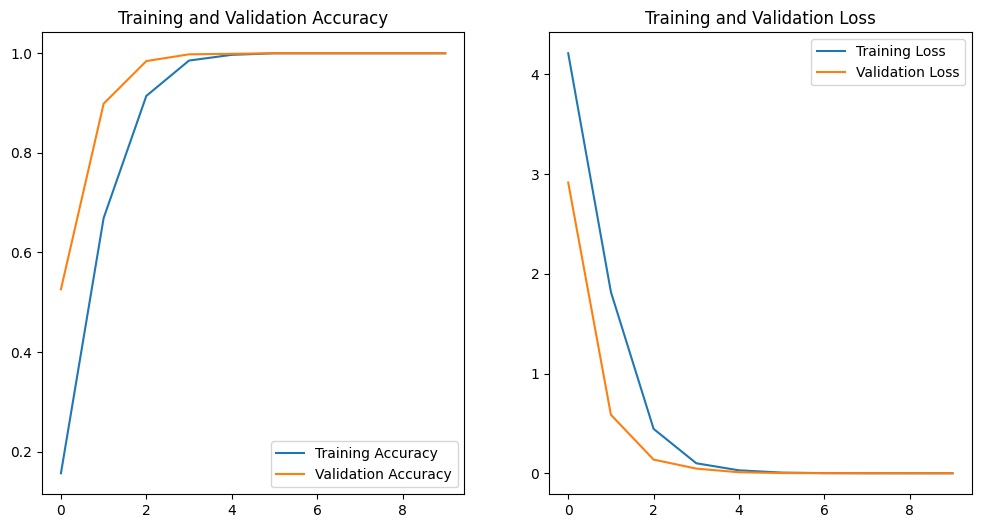

In [4]:
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


# Specify the directory containing the converted .png files
train_data_dir = r'Z:\code\python-facog\converted_images'
validation_data_dir = r'Z:\code\python-facog\converted_images'  # Change this if you have a separate validation set

# Define the image size and batch size
image_size = (224, 224)  # Adjust as needed
batch_size = 32  # Adjust as needed

# Data augmentation and preprocessing for training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data preprocessing for validation set
validation_datagen = ImageDataGenerator(rescale=1.0/255)
train_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set the number of epochs
epochs = 10  # Adjust as needed

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()


# Save the model if needed
model.save('face_recognition_model.keras')
plot_history(history)


Found 723 images belonging to 86 classes.
Found 235 images belonging to 86 classes.
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.0130 - loss: 5.2351 - val_accuracy: 0.0000e+00 - val_loss: 4.4514
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.0167 - loss: 4.4483 - val_accuracy: 0.0255 - val_loss: 4.4140
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.0257 - loss: 4.3985 - val_accuracy: 0.0213 - val_loss: 4.3266
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - accuracy: 0.0359 - loss: 4.3000 - val_accuracy: 0.0468 - val_loss: 4.1993
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 256ms/step - accuracy: 0.0756 - loss: 4.1751 - val_accuracy: 0.0851 - val_loss: 4.0210
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 266ms/step - accuracy: 0.0816 - loss: 3.9460 - val_accuracy: 0.1702 - val_loss: 3.7314
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.1286 - loss: 3.6923 - val_accuracy: 0.1660 - val_loss: 3.5713
Epoch 8/50
23/23

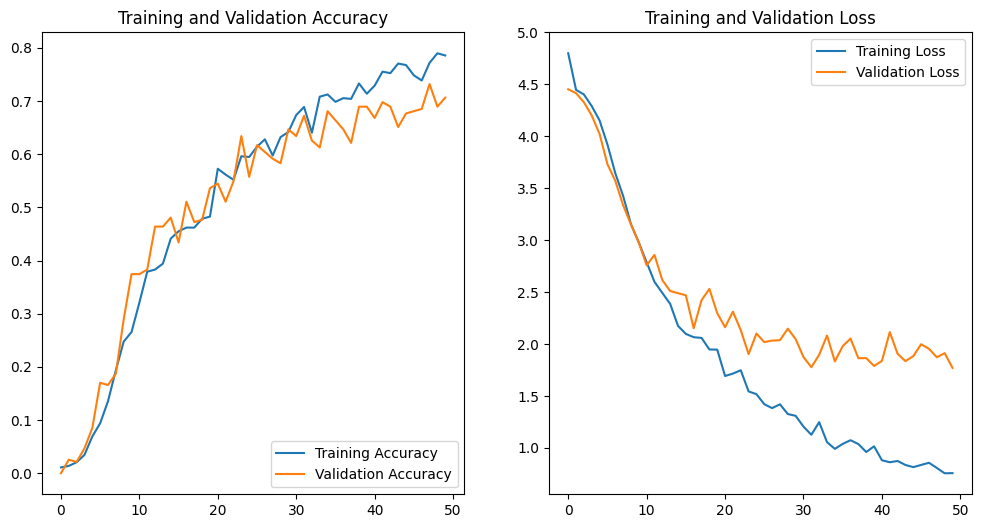

In [8]:
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Specify the directory containing the converted .png files
data_dir = r'Z:\code\python-facog\converted_images'  # Single directory for both training and validation

# Define the image size and batch size
image_size = (224, 224)  # Adjust as needed
batch_size = 32  # Adjust as needed

# Create ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=258/958  # 258 images for validation, 700 for training
)

# Data generator for training set
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Training data
    shuffle=True
)

# Data generator for validation set
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Validation data
    shuffle=True
)

# Define the CNN model, add layer and architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set the number of epochs
epochs = 100  # Adjust as needed

# Train the model and store the history
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Function to plot the training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Save the model if needed
model.save('face_recognition_model.keras')

# Plot the history
plot_history(history)
